In [1]:
%matplotlib inline

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

from ctisim import LogisticTrap, ITL_AMP_GEOM, SegmentSimulator, OutputAmplifier, LinearTrap

# Logistic Trap Modeling

Goal: Investigate how changes to the logistic function parameters affect the CTI measurements.

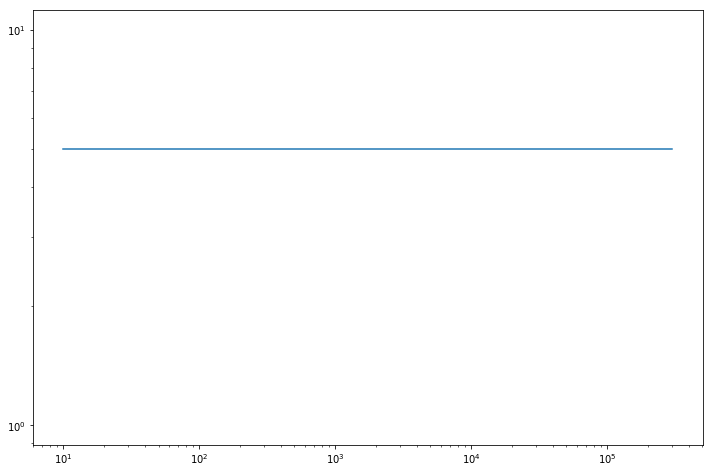

In [26]:
## Plot logistic function for given parameters
x = np.logspace(1, np.log10(300000.), 100)
k = 1.75
f0 = 50.0

size = 5.0

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
y = np.clip(size/(1.+np.exp(-k*(x-f0))), 5.0, size)
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')

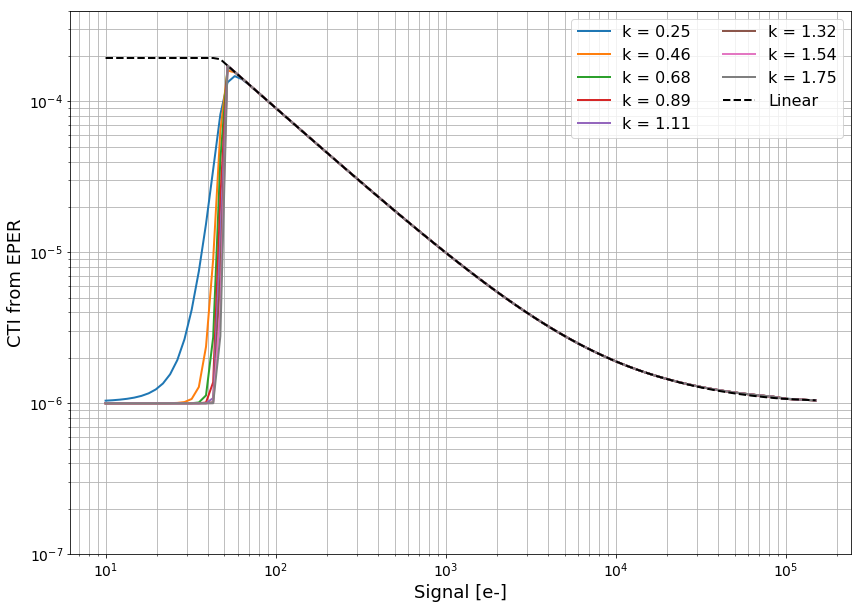

In [46]:
## Test how changes in parameters affect CTI results
amp_geom = ITL_AMP_GEOM
noise = 0.
#noise = 6.5/np.sqrt(2000.)
output_amplifier = OutputAmplifier(1.0, noise, offset=0.0)

flux_array = np.logspace(1, np.log10(150000.), 100)

## Create ramp exposure
nx = amp_geom.nx
prescan_width = amp_geom.prescan_width
serial_overscan_width = amp_geom.serial_overscan_width
parallel_overscan_width = 0

cti = 1.E-6

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

## Plot logistic results for different parameter values
k_array = np.linspace(0.25, 1.75, 8)
for k in k_array:

    trap = LogisticTrap(5.0, 0.8, 1, 50.0, k)

    imarr = np.zeros((len(flux_array), nx))
    flat = SegmentSimulator(imarr, prescan_width, output_amplifier, cti=cti, traps=trap)
    flat.ramp_exp(flux_array)

    im = flat.simulate_readout(serial_overscan_width=serial_overscan_width, 
                               parallel_overscan_width=parallel_overscan_width,
                               do_bias_drift=False)

    last_pix = im[:, nx+prescan_width-1]
    oscan1 = im[:, nx+prescan_width]
    oscan2 = im[:, nx+prescan_width+1]

    cti_results = (oscan1+oscan2)/((nx+prescan_width)*last_pix)

    ax.plot(flux_array, cti_results, label='k = {0:0.2f}'.format(k), linewidth=2)
    
## Plot linear model results
trap = LinearTrap(5.0, 0.8, 1, 0.1, 0.0)

imarr = np.zeros((len(flux_array), nx))
flat = SegmentSimulator(imarr, prescan_width, output_amplifier, cti=cti, traps=trap)
flat.ramp_exp(flux_array)

im = flat.simulate_readout(serial_overscan_width=serial_overscan_width, 
                           parallel_overscan_width=parallel_overscan_width,
                           do_bias_drift=False)

last_pix = im[:, nx+prescan_width-1]
oscan1 = im[:, nx+prescan_width]
oscan2 = im[:, nx+prescan_width+1]

cti_results = (oscan1+oscan2)/((nx+prescan_width)*last_pix)
ax.plot(flux_array, cti_results, label='Linear'.format(k), linewidth=2, linestyle='--', color='black')
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1.E-7, 4.E-4)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(which='both')
ax.set_ylabel('CTI from EPER', fontsize=18)
ax.set_xlabel('Signal [e-]', fontsize=18)
ax.legend(ncol=k_array.shape[0]//4, fontsize=16)

Text(0.5, 0, 'Overscan Column')

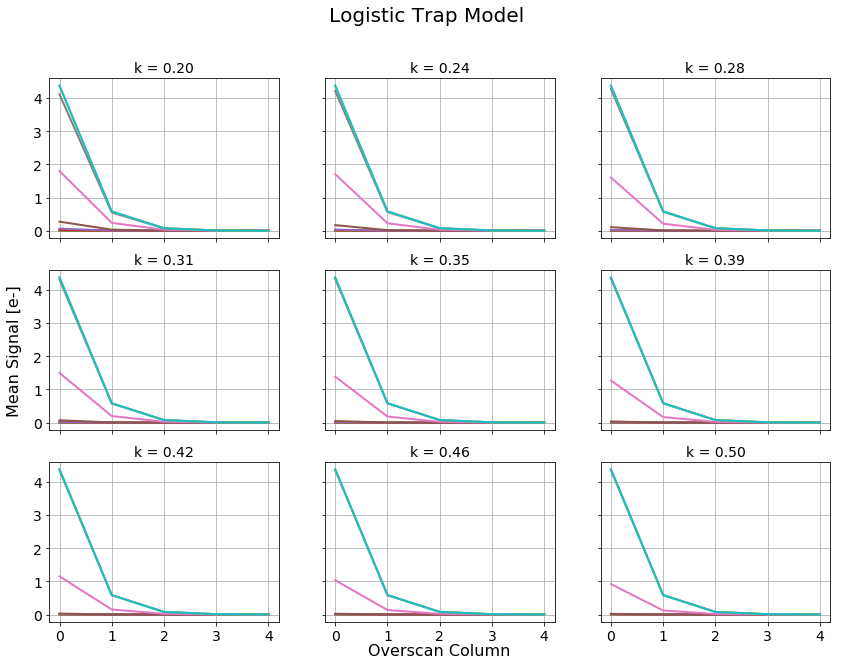

In [21]:
## Test how changes in parameters affect overscan column results
amp_geom = ITL_AMP_GEOM
output_amplifier = OutputAmplifier(1.0, 0.0, offset=0.0)

## Create ramp exposure
nx = amp_geom.nx
prescan_width = amp_geom.prescan_width
serial_overscan_width = amp_geom.serial_overscan_width
parallel_overscan_width = 0

cti = 1.E-6
flux_array = np.logspace(1, 2, 10)
k_array = np.linspace(0.2, 0.5, 9)

fig, ax = plt.subplots(3, 3, figsize=(14, 10), sharex=True, sharey=True)
ax = ax.flatten()

for j, k in enumerate(k_array):

    trap = LogisticTrap(5.0, 0.5, 1, 50.0, k)

    imarr = np.zeros((len(flux_array), nx))
    flat = SegmentSimulator(imarr, prescan_width, output_amplifier, cti=cti, traps=trap)
    flat.ramp_exp(flux_array)

    im = flat.simulate_readout(serial_overscan_width=serial_overscan_width, 
                               parallel_overscan_width=parallel_overscan_width,
                               do_bias_drift=False)

    for i in range(flux_array.shape[0]):
        ax[j].plot(im[i, nx+prescan_width:nx+prescan_width+5], linewidth=2)
        ax[j].set_title('k = {0:0.2f}'.format(k), fontsize=14)
    
    ax[j].tick_params(axis='both', which='major', labelsize=14)
    ax[j].grid(which='both')
    
fig.suptitle('Logistic Trap Model', fontsize=20)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Mean Signal [e-]', fontsize=16)
plt.xlabel('Overscan Column', fontsize=16)
#supax.set_ylabel('Test')

Text(0.5, 0, 'Overscan Column')

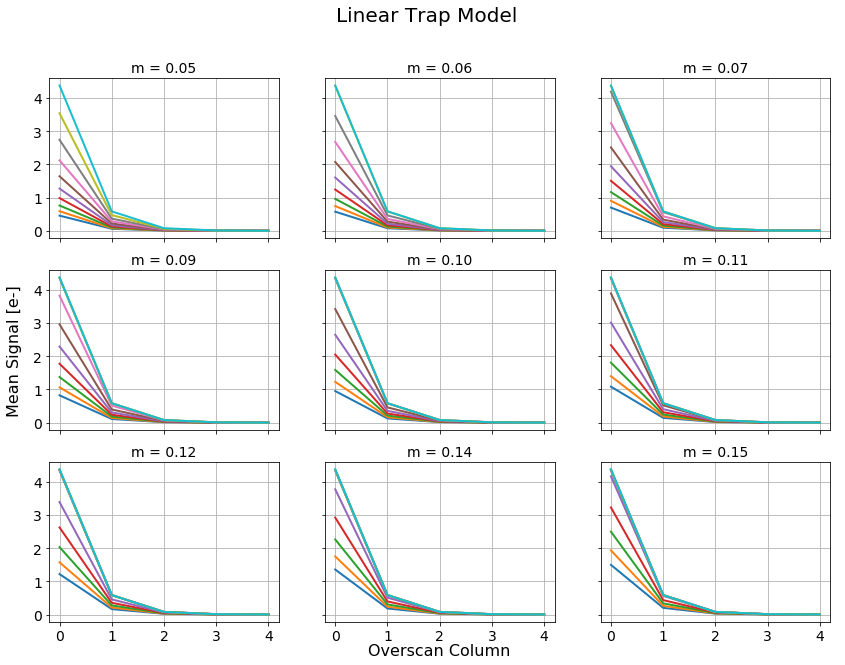

In [18]:
## Test how changes in parameters affect overscan column results
amp_geom = ITL_AMP_GEOM
output_amplifier = OutputAmplifier(1.0, 0.0, offset=0.0)

## Create ramp exposure
nx = amp_geom.nx
prescan_width = amp_geom.prescan_width
serial_overscan_width = amp_geom.serial_overscan_width
parallel_overscan_width = 0

cti = 1.E-6
flux_array = np.logspace(1, 2, 10)
m_array = np.linspace(0.05, 0.15, 9)

fig, ax = plt.subplots(3, 3, figsize=(14, 10), sharex=True, sharey=True)
ax = ax.flatten()

for j, m in enumerate(m_array):

    trap = LinearTrap(5.0, 0.5, 1, m, 0.0)

    imarr = np.zeros((len(flux_array), nx))
    flat = SegmentSimulator(imarr, prescan_width, output_amplifier, cti=cti, traps=trap)
    flat.ramp_exp(flux_array)

    im = flat.simulate_readout(serial_overscan_width=serial_overscan_width, 
                               parallel_overscan_width=parallel_overscan_width,
                               do_bias_drift=False)

    for i in range(flux_array.shape[0]):
        ax[j].plot(im[i, nx+prescan_width:nx+prescan_width+5], linewidth=2)
        ax[j].set_title('m = {0:0.2f}'.format(m), fontsize=14)
    
    ax[j].tick_params(axis='both', which='major', labelsize=14)
    ax[j].grid(which='both')

fig.suptitle('Linear Trap Model', fontsize=20)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Mean Signal [e-]', fontsize=16)
plt.xlabel('Overscan Column', fontsize=16)
#supax.set_ylabel('Test')

# ITL Full Deferred Charge Model

In [48]:
## Overscan results header
overscan_results = '../examples/data/ITL_overscan_results.fits'
hdul = fits.open(overscan_results)

prihdr = hdul[0].header
print(repr(prihdr), '\n')

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATASEC = '[4:512,1:2000]'                                                      
NAMPS   =                   16                                                  
CHECKSUM= 'NZoQQWoPNWoPNWoP'   / HDU checksum updated 2019-11-14T15:58:10       
DATASUM = '0       '           / data unit checksum updated 2019-11-14T15:58:10  



Text(0.5, 0, 'Signal [e-]')

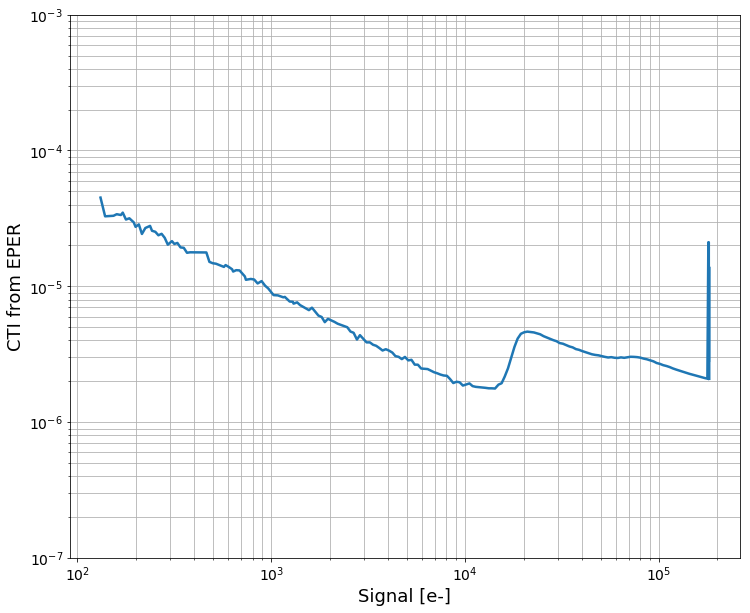

In [74]:
##CTI vs Signal for Data
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

amp = 7
data = hdul[amp].data
signal_all = data['FLUX']
indices = np.argsort(signal_all)
signal_data = signal_all[indices]

last_pix = data['MEANROW'][:, 511]
oscan1 = data['MEANROW'][:, 512]
#oscan2 = data['MEANROW'][:, 513]
oscan2 = 0
cti_data = ((oscan1+oscan2)/(512*last_pix))[indices]
      
ax.plot(signal_data, cti_data, linewidth=2.5)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.E-7, 1.E-3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(which='both')
ax.set_ylabel('CTI from EPER', fontsize=18)
ax.set_xlabel('Signal [e-]', fontsize=18)

In [80]:
## Low signal trapping
mcmc_results = fits.open('../examples/data/ITL_overscan_mcmc_results.fits')
mcmc_data = mcmc_results[1].data

print(repr(mcmc_results[1].header))

for amp in range(1, 17):
    size = mcmc_data['TRAP_SIZE'][amp-1]
    if size == 0.0:
        print(amp, 'no trap')

## Trap parameters
cti = mcmc_data['CTI'][amp-1]
size = mcmc_data['TRAP_SIZE'][amp-1]
emission_time = mcmc_data['TRAP_TAU'][amp-1]
scaling = mcmc_data['TRAP_DFACTOR'][amp-1]
lowsignal_trap = LinearTrap(size, emission_time, 1, scaling, 0.0)
print(emission_time)

## Bias hysteresis parameters
drift_scale = mcmc_data['DRIFT_SIZE'][amp-1]
decay_time = mcmc_data['DRIFT_TAU'][amp-1]
threshold = mcmc_data['DRIFT_THRESHOLD'][amp-1]
output_amplifier = OutputAmplifier(1.0, 0.0, offset=0.0, drift_scale=drift_scale,
                                   decay_time=decay_time, threshold=threshold)


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   28 / length of dimension 1                          
NAXIS2  =                   16 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'CTI     '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'DRIFT_SIZE'                                                          
TFORM2  = 'E       '                                                            
TTYPE3  = 'DRIFT_TAU'       

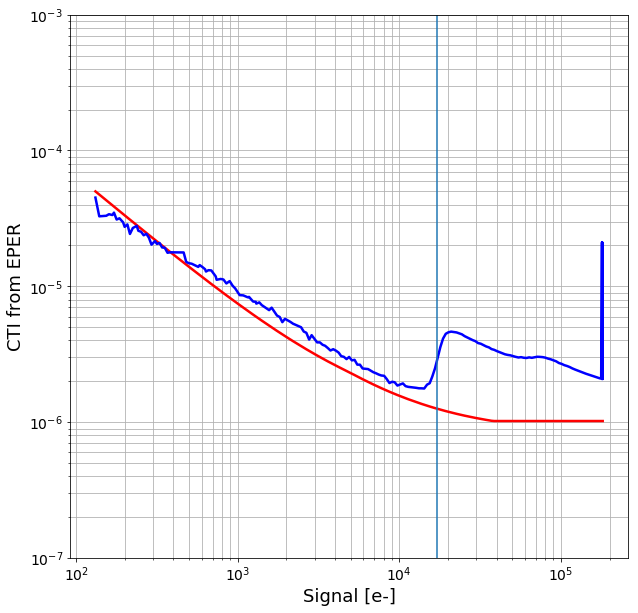

In [75]:
imarr = np.zeros((len(signal_data), nx))
flat = SegmentSimulator(imarr, prescan_width, output_amplifier, cti=cti, traps=lowsignal_trap)
flat.ramp_exp(signal_data)

im = flat.simulate_readout(serial_overscan_width=serial_overscan_width, 
                           parallel_overscan_width=parallel_overscan_width,
                           do_bias_drift=False)

last_pix = im[:, 511]
oscan1 = im[:, 512]
cti_model = (oscan1/(512*last_pix))
      
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(signal_data, cti_model, linewidth=2.5, color='red')
ax.plot(signal_data, cti_data, linewidth=2.5, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.E-7, 1.E-3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(which='both')
ax.set_ylabel('CTI from EPER', fontsize=18)
ax.set_xlabel('Signal [e-]', fontsize=18)
ax.axvline(x=17000.)

Text(0.5, 0, 'Signal [e-]')

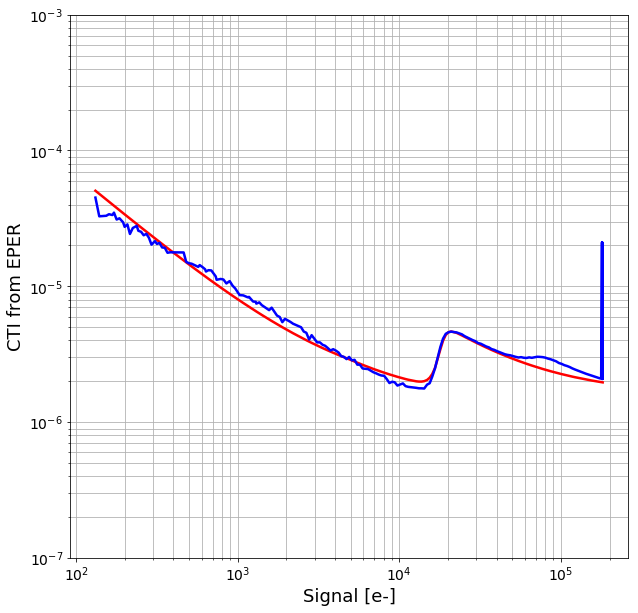

In [79]:
midsignal_trap = LogisticTrap(40, 0.5, 1, 18000., 0.0010)

imarr = np.zeros((len(signal_data), nx))
flat = SegmentSimulator(imarr, prescan_width, output_amplifier, cti=cti, traps=[lowsignal_trap, midsignal_trap])
flat.ramp_exp(signal_data)

im = flat.simulate_readout(serial_overscan_width=serial_overscan_width, 
                           parallel_overscan_width=parallel_overscan_width,
                           do_bias_drift=True)

last_pix = im[:, 511]
oscan1 = im[:, 512]
cti_model = (oscan1)/(512*last_pix)
      
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(signal_data, cti_model, linewidth=2.5, color='red')
ax.plot(signal_data, cti_data, linewidth=2.5, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.E-7, 1.E-3)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(which='both')
ax.set_ylabel('CTI from EPER', fontsize=18)
ax.set_xlabel('Signal [e-]', fontsize=18)